**<center>* Assignment 10: RECOMMENDATAION SYSTEM   *</center>**

DATASCIENCE

name: GUVVALA SOMASEKHAR REDDY

mail: showmove5697@gmail.com

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine,correlation

#Problem)

Build a recommender system by using cosine simillarties score.

#solution:

In [ ]:
#data loading
from google.colab import files
uploaded=files.upload()

Saving book.csv to book.csv


In [ ]:
books=pd.read_csv('book.csv',encoding='ISO-8859-1',index_col=0)
books

,User.ID,Book.Title,Book.Rating
1,276726,Classical Mythology,5
2,276729,Clara Callan,3
3,276729,Decision in Normandy,6
4,276736,Flu: The Story of the Great Influenza Pandemic...,8
5,276737,The Mummies of Urumchi,6
...,...,...,...
9996,162121,American Fried: Adventures of a Happy Eater.,7
9997,162121,Cannibal In Manhattan,9
9998,162121,How to Flirt: A Practical Guide,7
9999,162121,Twilight,8


##Basic & EDA

In [ ]:
books.shape

(10000, 3)

In [ ]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   User.ID      10000 non-null  int64 
 1   Book.Title   10000 non-null  object
 2   Book.Rating  10000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 312.5+ KB


In [ ]:
books.rename(columns={'User.ID':'user_id','Book.Title':'book_title','Book.Rating':'book_rating'},inplace=True)
books.head()

,user_id,book_title,book_rating
1,276726,Classical Mythology,5
2,276729,Clara Callan,3
3,276729,Decision in Normandy,6
4,276736,Flu: The Story of the Great Influenza Pandemic...,8
5,276737,The Mummies of Urumchi,6


In [ ]:
books.isna().sum()

user_id        0
book_title     0
book_rating    0
dtype: int64

*  There is no null values in the data set.

In [ ]:
books.duplicated().value_counts()

False    9998
True        2
dtype: int64

*  There are two duplicate records in the dataset.

In [ ]:
books[books.duplicated()]

,user_id,book_title,book_rating
5052,2152,Le nouveau soleil de Teur,7
7440,3757,The Magician's Tale,7


In [ ]:
#sorting with user_id
books=books.sort_values('user_id')
#removing duplicate records
books_cln=books.drop_duplicates().reset_index()
books_cln=books_cln.drop('index',axis=1)
books_cln

,user_id,book_title,book_rating
0,8,Wings,5
1,8,The Western way: A practical guide to the West...,5
2,8,Ancient Celtic Romances,5
3,8,Truckers,5
4,8,The Art Of Celtia,7
...,...,...,...
9993,278854,La crÃ³nica del PerÃº (CrÃ³nicas de AmÃ©rica),7
9994,278854,Celtic Mythology (Library of the World's Myths...,8
9995,278854,A corrente de Trewis Scott,7
9996,278854,As valkÃ­rias,7


In [ ]:
for i, column in enumerate(books_cln.columns, 1):
  print('  ')
  print(' Number of unique oservations in',books_cln[column].name,':',len(books_cln[column].unique()))
  print('  ')
  print(' Different observations with count in ',books_cln[column].name,':\n',books_cln[column].value_counts())
  print('------------------------------------------------------------------')

  
 Number of unique oservations in user_id : 2182
  
 Different observations with count in  user_id :
 3757      522
162052    214
2276      212
4017      156
277427    150
         ... 
3800        1
3798        1
739         1
3789        1
3934        1
Name: user_id, Length: 2182, dtype: int64
------------------------------------------------------------------
  
 Number of unique oservations in book_title : 9659
  
 Different observations with count in  book_title :
 Fahrenheit 451                                     5
The Amber Spyglass (His Dark Materials, Book 3)    4
Ender's Game (Ender Wiggins Saga (Paperback))      4
Charlie and the Chocolate Factory                  4
The Subtle Knife (His Dark Materials, Book 2)      4
                                                  ..
The Littles to the Rescue (Littles)                1
When I Grow Up (Little Look-Look)                  1
The Crying Child                                   1
SABLE MOON                                    

## Visualizing data points

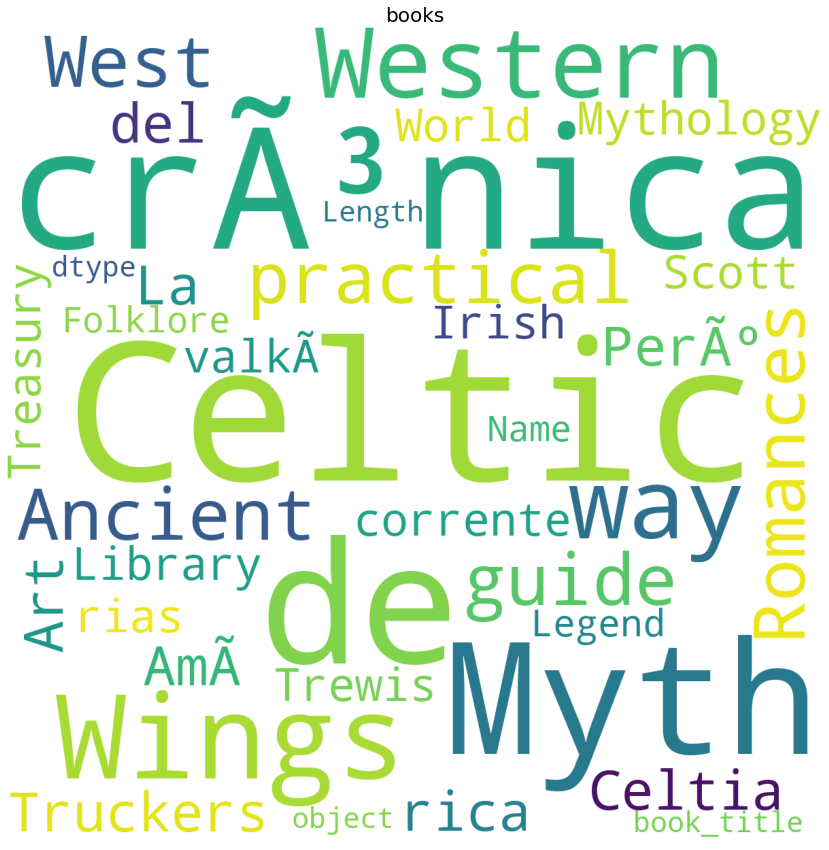

In [ ]:
from wordcloud import WordCloud
plt.figure(figsize=(15,15))
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 250).generate(str(books_cln.book_title))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('books',fontsize = 20)
plt.show()

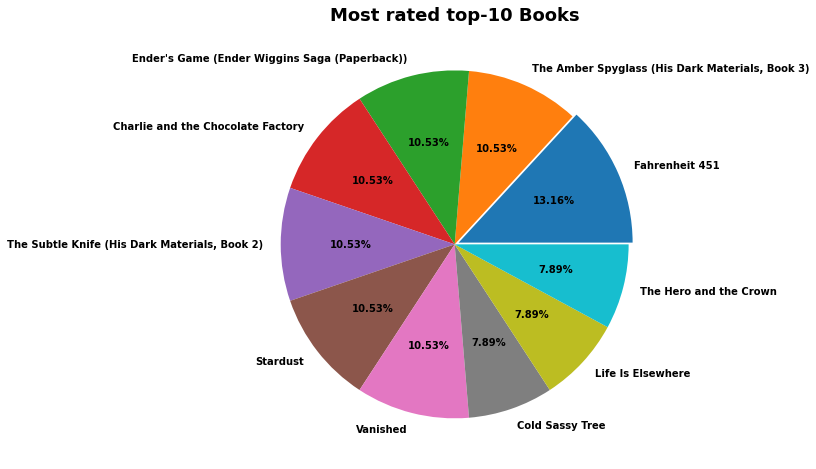

In [ ]:
plt.figure(figsize = (12,8))
plt.pie(books_cln['book_title'].value_counts().head(10), labels=books_cln['book_title'].value_counts().head(10).index,
        explode = [0.025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
        autopct= '%.2f%%', textprops = {'size' : 10, 'fontweight': 'bold'})

plt.title("Most rated top-10 Books", fontsize = 18, fontweight = 'bold');

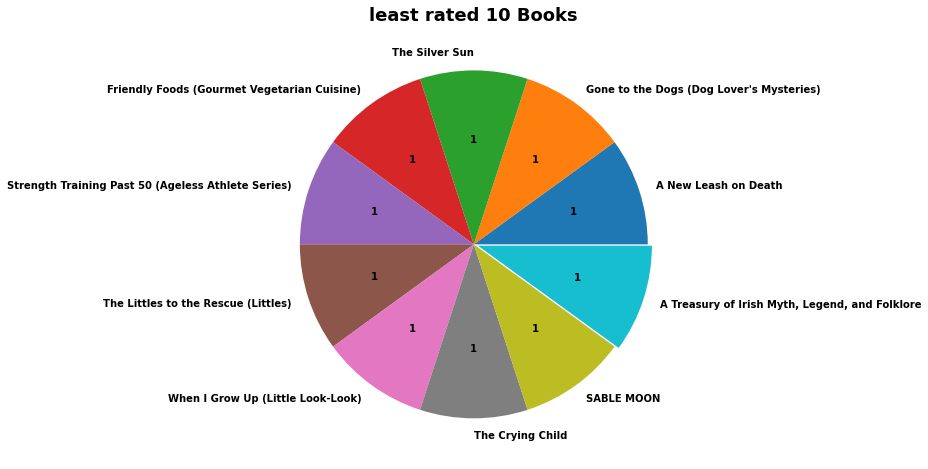

In [ ]:
plt.figure(figsize = (12,8))
plt.pie(books_cln['book_title'].value_counts().tail(10), labels=books_cln['book_title'].value_counts().tail(10).index,
        explode = [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025],
        autopct= '1', textprops = {'size' : 10, 'fontweight': 'bold'})

plt.title("least rated 10 Books", fontsize = 18, fontweight = 'bold');

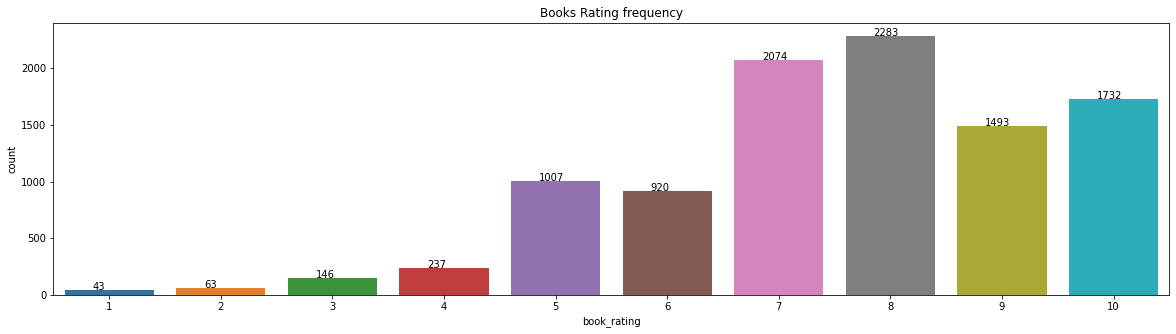

In [ ]:
#plotting distplots to observe datapoints nature
plt.figure(figsize=(20,5))
ax=sns.countplot(books_cln['book_rating'])
plt.title('Books Rating frequency')
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))


*  Most frequent ratings of books by users are: 8,7,10 and 9.

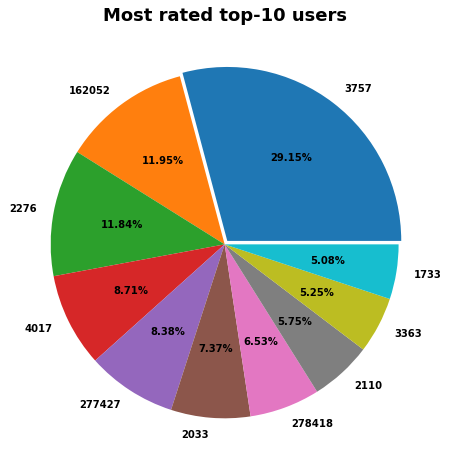

In [ ]:
plt.figure(figsize = (12,8))
plt.pie(books_cln['user_id'].value_counts().head(10), labels=books_cln['user_id'].value_counts().head(10).index,
        explode = [0.025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
        autopct= '%.2f%%', textprops = {'size' : 10, 'fontweight': 'bold'})

plt.title("Most rated top-10 users", fontsize = 18, fontweight = 'bold');

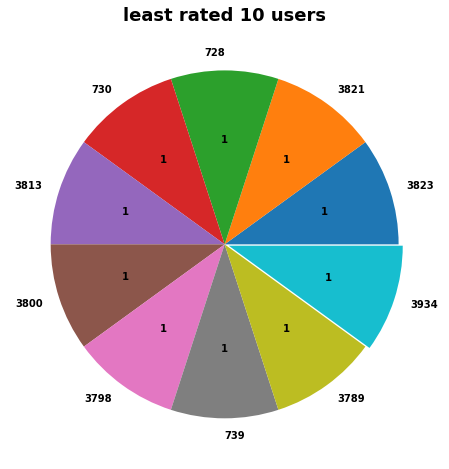

In [ ]:
plt.figure(figsize = (12,8))
plt.pie(books_cln['user_id'].value_counts().tail(10), labels=books_cln['user_id'].value_counts().tail(10).index,
        explode = [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025],
        autopct= '1', textprops = {'size' : 10, 'fontweight': 'bold'})

plt.title("least rated 10 users", fontsize = 18, fontweight = 'bold');

##Pivoting dataframe

In [ ]:
books_cln.columns

Index(['user_id', 'book_title', 'book_rating'], dtype='object')

In [ ]:
user_book_df = books_cln.pivot_table(index='user_id',
                                 columns='book_title',
                                 values='book_rating')
user_book_df

book_title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
user_id,,,,,,,,,,,,,,,,,,,,,
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN


In [ ]:
#Imputing those NaNs with 0 values
user_book_df.fillna(0,inplace=True)
user_book_df

book_title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
user_id,,,,,,,,,,,,,,,,,,,,,
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0


## Correlation similarity

In [ ]:
user_sim_corr=1-pairwise_distances(user_book_df.values,metric='correlation')
user_sim_corr

array([[ 1.00000000e+00, -2.71714970e-04, -2.71714970e-04, ...,
        -9.91259776e-04, -2.71714970e-04, -6.63481070e-04],
       [-2.71714970e-04,  1.00000000e+00, -1.03541106e-04, ...,
        -3.77734555e-04, -1.03541106e-04, -2.52829514e-04],
       [-2.71714970e-04, -1.03541106e-04,  1.00000000e+00, ...,
        -3.77734555e-04, -1.03541106e-04, -2.52829514e-04],
       ...,
       [-9.91259776e-04, -3.77734555e-04, -3.77734555e-04, ...,
         1.00000000e+00, -3.77734555e-04, -9.22362604e-04],
       [-2.71714970e-04, -1.03541106e-04, -1.03541106e-04, ...,
        -3.77734555e-04,  1.00000000e+00, -2.52829514e-04],
       [-6.63481070e-04, -2.52829514e-04, -2.52829514e-04, ...,
        -9.22362604e-04, -2.52829514e-04,  1.00000000e+00]])

## Cosine similarity

In [ ]:
#Calculating Cosine Similarity between Users
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine,correlation

user_sim=1-pairwise_distances(user_book_df.values,metric='cosine')
user_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
#Store the results in a dataframe
user_sim_df=pd.DataFrame(user_sim)
user_sim_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2172,2173,2174,2175,2176,2177,2178,2179,2180,2181
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Set the index and column names to user ids 
user_sim_df.index=books_cln.user_id.unique()
user_sim_df.columns=books_cln.user_id.unique()

user_sim_df

,8,9,10,12,14,16,17,19,22,26,...,278831,278832,278836,278843,278844,278846,278849,278851,278852,278854
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
278849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
278851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
278852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
user_sim_df.iloc[0:25,0:25]

,8,9,10,12,14,16,17,19,22,26,...,53,56,64,67,69,70,73,75,78,81
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
np.fill_diagonal(user_sim,0)
user_sim_df.iloc[50:75,50:75]

,178,182,183,185,190,202,212,215,217,221,...,233,242,243,244,247,249,254,256,257,269
178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
182,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
183,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
190,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
202,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
212,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
215,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
217,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#most similar users
user_sim_df.idxmax(axis=1)

8              8
9              9
10            10
12            12
14            14
           ...  
278846    278846
278849    278849
278851    278851
278852    278852
278854    278854
Length: 2182, dtype: int64

In [ ]:
similarid_df=pd.DataFrame(user_sim_df.idxmax(axis=1),columns=['similarity_with_id']).reset_index()
similarid_df.rename(columns={'index':'user_id'},inplace=True)
similarid_df.head()

,user_id,similarity_with_id
0,8,8
1,9,9
2,10,10
3,12,12
4,14,14


In [ ]:
pd.set_option("max_rows",None)
similarid_df[similarid_df['user_id']!=similarid_df['similarity_with_id']]

,user_id,similarity_with_id
427,1559,1326
1101,3952,3951
1235,160926,2576
1426,161645,698
1528,162004,933
1545,162063,705
1625,276934,3951
1722,277284,2355
1976,278131,278110
1985,278161,2070


In [ ]:
books_cln[(books_cln['user_id']==278418) | (books_cln['user_id']==19)]

,user_id,book_title,book_rating
18,19,The Murder Book,7
9504,278418,City of Bones,7
9505,278418,Absolute Zero,5
9506,278418,Lucky You,5
9507,278418,CAT'S EYE,4
9508,278418,The Handmaid's Tale,5
9509,278418,The Murder Book,6
9510,278418,Blood Test,7
9511,278418,Private Eyes (Alex Delaware Novels (Paperback)),9
9512,278418,When the Bough Breaks,7


In [ ]:
books_cln[(books_cln['user_id']==278206) | (books_cln['user_id']==276850)]

,user_id,book_title,book_rating
7713,276850,The Beach House,7
9328,278206,The Beach House,5


In [ ]:
books_cln[(books_cln['user_id']==278202) | (books_cln['user_id']==276798)]

,user_id,book_title,book_rating
7635,276798,Seabiscuit: An American Legend,6
7636,276798,Lying Awake,5
7637,276798,To Kill a Mockingbird,7
9305,278202,Father McBride's Family Catechism: Based on th...,8
9306,278202,Wedding Day Murder: A Lucy Stone Mystery (Meie...,4
9307,278202,Haroun and the Sea of Stories,8
9308,278202,One for the Money (A Stephanie Plum Novel),4
9309,278202,The War Against Population: The Economics and ...,7
9310,278202,Something Under the Bed Is Drooling,10
9311,278202,As Nature Made Him: The Boy Who Was Raised As ...,4


In [ ]:
user_1=books_cln[books_cln['user_id']==278202]
user_2=books_cln[books_cln['user_id']==276798]
type(user_1),type(user_2)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

In [ ]:
pd.merge(user_1,user_2,on='book_title',how='outer')

,user_id_x,book_title,book_rating_x,user_id_y,book_rating_y
0,278202.0,Father McBride's Family Catechism: Based on th...,8.0,NaN,NaN
1,278202.0,Wedding Day Murder: A Lucy Stone Mystery (Meie...,4.0,NaN,NaN
2,278202.0,Haroun and the Sea of Stories,8.0,NaN,NaN
3,278202.0,One for the Money (A Stephanie Plum Novel),4.0,NaN,NaN
4,278202.0,The War Against Population: The Economics and ...,7.0,NaN,NaN
5,278202.0,Something Under the Bed Is Drooling,10.0,NaN,NaN
6,278202.0,As Nature Made Him: The Boy Who Was Raised As ...,4.0,NaN,NaN
7,278202.0,The Enthusiasms of Roberston Davies,4.0,NaN,NaN
8,278202.0,The Missionary's Catechism,3.0,NaN,NaN
9,278202.0,Catechism of the Catholic Church,1.0,NaN,NaN


#Conclusion:

In [ ]:
# For similar books recommendation
from numpy.lib.npyio import recfromtxt
def recommendations_for_user(user_id):
    print('\n Recommended Books for User_id',(user_id),':\n')
    recom = list(user_sim_df.sort_values([user_id], ascending= False).head().index)
    books_list = []
    for i in recom:
        books_list = books_list + list(books_cln[books_cln['user_id']==i]['book_title'])
    return set(books_list)-set(books_cln[books_cln['user_id']==user_id]['book_title'])

In [ ]:
#User_id 8 rated books
books_cln[books_cln['user_id']==8]

,user_id,book_title,book_rating
0,8,Wings,5
1,8,The Western way: A practical guide to the West...,5
2,8,Ancient Celtic Romances,5
3,8,Truckers,5
4,8,The Art Of Celtia,7
5,8,Keepers of the Earth Teachers Guide,6
6,8,The Celts Activity Book,6


In [ ]:
recommendations_for_user(8)


 Recommended Books for User_id 8 :



{'After All These Years',
 "Bad Jobs: My Last Shift at Albert Wong's Pagoda and Other Ugly Tales of the Workplace",
 'Belladonna: A Novel of Revenge',
 'Black Boy (American Hunger : a Record of Childhood and Youth)',
 'CHINA WHITE',
 'Chicken Soup from the Soul of Hawaii: Stories of Aloha to Create Paradise Wherever You Are',
 'Critical Judgment',
 'Daydreams',
 'End of the Road',
 'FOR COLORED GIRLS WHO HAVE CONSIDERED SUICIDE WHEN THE RAINBOW IS ENUF',
 "Flying Hawaii : A Pilot's Guide to the Islands",
 "I'm the One That I Want",
 'Jaguars Ripped My Flesh: Adventure Is a Risky Business (Bantam New Fiction Series)',
 'Jennifer, Hecate, MacBeth, William McKinley and Me, Elizabeth',
 'Katwalk (Kat Colorado Mysteries)',
 'Modern Women',
 'Mr. Bridge',
 'Mrs. Mike',
 'Night Train to Memphis',
 'On a Street Called Easy, in a Cottage Called Joye',
 "Pooh's Workout Book",
 'Random Family: Love, Drugs, Trouble, and Coming of Age in the Bronx',
 'Send in the Stunt Mom: The Second Collection of

In [ ]:
recommendations_for_user(3757)


 Recommended Books for User_id 3757 :



{'Death at the Priory: Sex, Love, and Murder in Victorian England',
 "Exiting Nirvana: A Daughter's Life with Autism",
 'Finishing Becca: A Story about Peggy Shippen and Benedict Arnold',
 'Guest of a Sinner',
 'Innocence',
 'Middle Age: A Romance',
 'Murder on Mulberry Bend (Gaslight Mystery)',
 'Passing On',
 'Sister (Mysteries &amp; Horror)',
 'Tea: A Novel',
 'The Guardian',
 'To the Lighthouse',
 'Wild Justice'}



---

<center> THANK YOU </center>


---

